<h1 align=center>Mini Project 2</h1>

Data set: Indians Diabetes Database (Source: UCI dataset)

Problem: Classify 2 class non-diabetic and diabetic

#### Attribute desciption

1. Pregnant: Number of pregnant

2. Glucose: Amount of glucose

3. BloodPressure: Pressure of blood (mm/Hg)

4. TricepsSkinThickness: Thickness of skin in triceps (mm)

5. Insulin: Amount of Insulin

6. BMI: weight/height^2 (kg/m^2)

7. Pedigree: Probability diabetic from family

8. Age: 

9. Diabetes: 0: non-diabetic and 1: diabetic

#### Import libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import itertools

<h2>Read data and description</h2>

In [19]:
myData = pd.read_csv("Diabets.csv")
myData.head(10)

,Pregnant,Glucose,BloodPressure,TricepsSkinThickness,Insulin,BMI,Pedigree,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [20]:
myData.keys()

Index(['Pregnant', 'Glucose', 'BloodPressure', 'TricepsSkinThickness',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Diabetes'],
      dtype='object')

In [9]:
myData.shape

(768, 9)

In [21]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pregnant              768 non-null    int64  
 1   Glucose               768 non-null    int64  
 2   BloodPressure         768 non-null    int64  
 3   TricepsSkinThickness  768 non-null    int64  
 4   Insulin               768 non-null    int64  
 5   BMI                   768 non-null    float64
 6   Pedigree              768 non-null    float64
 7   Age                   768 non-null    int64  
 8   Diabetes              768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<h2>Data exploration</h2>

In [22]:
# Check value = 0
print("Glucose = 0: ", myData[myData['Glucose'] == 0].shape)
print("BloodPressure = 0: ", myData[myData['BloodPressure'] == 0].shape)
print("TricepsSkinThickness = 0: ", myData[myData['TricepsSkinThickness'] == 0].shape)
print("Insulin = 0: ", myData[myData['Insulin'] == 0].shape)
print("BMI = 0: ", myData[myData['BMI'] == 0].shape)
print("Pedigree = 0: ", myData[myData['Pedigree'] == 0].shape)

Glucose = 0:  (5, 9)
BloodPressure = 0:  (35, 9)
TricepsSkinThickness = 0:  (227, 9)
Insulin = 0:  (374, 9)
BMI = 0:  (11, 9)
Pedigree = 0:  (0, 9)


In [23]:
# Replace value = 0 by mean
myData[['Glucose', 'BloodPressure', 'TricepsSkinThickness', 'Insulin', 'BMI']] = \
    myData[['Glucose', 'BloodPressure', 'TricepsSkinThickness', 'Insulin', 'BMI']].\
        replace(to_replace=0, value=round(myData[['Glucose', 'BloodPressure',
                                                      'TricepsSkinThickness', 'Insulin', 'BMI']].mean()))

myData.head(10)

,Pregnant,Glucose,BloodPressure,TricepsSkinThickness,Insulin,BMI,Pedigree,Age,Diabetes
0,6,148,72,35,80,33.6,0.627,50,1
1,1,85,66,29,80,26.6,0.351,31,0
2,8,183,64,21,80,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,21,80,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,69,21,80,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,21,80,32.0,0.232,54,1


Diabetes:  [268]
Non_diabetes:  [500]


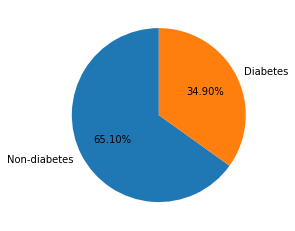

In [24]:
# Proportion of each class using pie chart

outcome = myData[['Diabetes']]
diabetes = outcome.loc[outcome.Diabetes == 1].count()
non_diabetes = outcome.loc[outcome.Diabetes == 0].count()
print("Diabetes: ", diabetes.values)
print("Non_diabetes: ", non_diabetes.values)

values = []
values.append(non_diabetes.values[0])
values.append(diabetes.values[0])
labels = ['Non-diabetes', 'Diabetes']
plt.pie(values, labels=labels, startangle=90, autopct='%1.2f%%')
plt.show()

==> Diabetes have the larger proportion than Non-diabetes

Pregnant                0.221898
Glucose                 0.492911
BloodPressure           0.162879
TricepsSkinThickness    0.177741
Insulin                 0.179308
BMI                     0.312249
Pedigree                0.173844
Age                     0.238356
Diabetes                1.000000
Name: Diabetes, dtype: float64


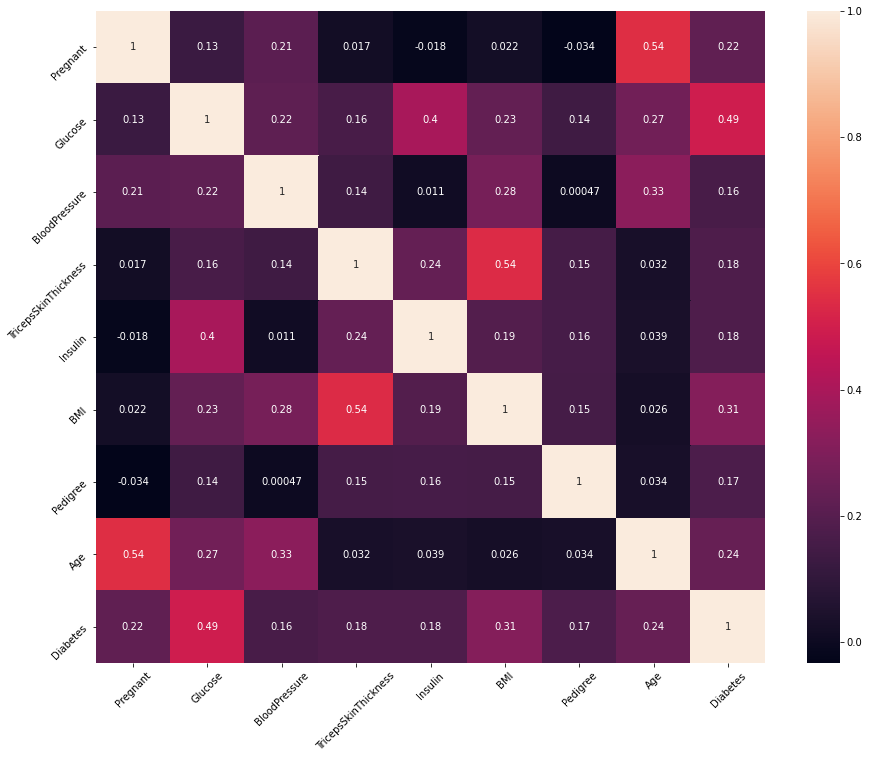

In [25]:
# Calculate the relationship between each attibute using corrlation matrix

df_corr = myData.corr()
print(df_corr['Diabetes'])
plt.figure(figsize=(15, 12))
sn.heatmap(df_corr, xticklabels=df_corr.columns, yticklabels=df_corr.columns, annot=True)
plt.xticks(rotation='45')
plt.yticks(rotation='45')
plt.show()

In [26]:
# Remove the attributes that has the relationship with Diabetes less than 0.2

col_corr = df_corr['Diabetes']
mask = abs(col_corr) > 0.2
print(mask)
myData = myData.drop(axis=1, columns=np.asanyarray(myData.keys())[~mask])
myData.head(10)

Pregnant                 True
Glucose                  True
BloodPressure           False
TricepsSkinThickness    False
Insulin                 False
BMI                      True
Pedigree                False
Age                      True
Diabetes                 True
Name: Diabetes, dtype: bool


,Pregnant,Glucose,BMI,Age,Diabetes
0,6,148,33.6,50,1
1,1,85,26.6,31,0
2,8,183,23.3,32,1
3,1,89,28.1,21,0
4,0,137,43.1,33,1
5,5,116,25.6,30,0
6,3,78,31.0,26,1
7,10,115,35.3,29,0
8,2,197,30.5,53,1
9,8,125,32.0,54,1


In [27]:
myData.shape

(768, 5)

In [28]:
myData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pregnant  768 non-null    int64  
 1   Glucose   768 non-null    int64  
 2   BMI       768 non-null    float64
 3   Age       768 non-null    int64  
 4   Diabetes  768 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 30.1 KB


<h2>Data preparation</h2>

#### Create data set X and y

In [29]:
X = myData.drop('Diabetes', axis=1).values
X[0:10]

array([[  6. , 148. ,  33.6,  50. ],
       [  1. ,  85. ,  26.6,  31. ],
       [  8. , 183. ,  23.3,  32. ],
       [  1. ,  89. ,  28.1,  21. ],
       [  0. , 137. ,  43.1,  33. ],
       [  5. , 116. ,  25.6,  30. ],
       [  3. ,  78. ,  31. ,  26. ],
       [ 10. , 115. ,  35.3,  29. ],
       [  2. , 197. ,  30.5,  53. ],
       [  8. , 125. ,  32. ,  54. ]])

In [30]:
y = myData['Diabetes'].values
y[0:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

#### Normalize data

In [31]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:10]

array([[ 0.63994726,  0.86525364,  0.16724016,  1.4259954 ],
       [-0.84488505, -1.20601255, -0.85155088, -0.19067191],
       [ 1.23388019,  2.01595708, -1.33183808, -0.10558415],
       [-0.84488505, -1.07450358, -0.63323851, -1.04154944],
       [-1.14185152,  0.50360399,  1.54988514, -0.0204964 ],
       [ 0.3429808 , -0.18681807, -0.99709246, -0.27575966],
       [-0.25095213, -1.43615323, -0.21116794, -0.61611067],
       [ 1.82781311, -0.21969531,  0.41466084, -0.36084741],
       [-0.54791859,  2.47623845, -0.28393873,  1.68125866],
       [ 1.23388019,  0.1090771 , -0.06562636,  1.76634642]])

#### Split train-test data set

In [32]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=3)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(537, 4) (537,)
(231, 4) (231,)


<h2>Modeling</h2>

#### Random forest

In [33]:
myRF = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5, random_state=3)
myRF.fit(train_x, train_y)

# Predict
predictRF = myRF.predict(test_x)
print(predictRF[0:20])
print(test_y[0:20])
print()

# Evaluation
print("RandomForest Train data set's Accuracy: ", metrics.accuracy_score(train_y,  myRF.predict(train_x)))
print("RandomForest Test data set's Accuracy: ", metrics.accuracy_score(test_y,  predictRF))

[0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
[0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1]

RandomForest Train data set's Accuracy:  0.8528864059590316
RandomForest Test data set's Accuracy:  0.70995670995671


#### KNN with K = 4

In [34]:
myKNN = KNeighborsClassifier(n_neighbors=4)
myKNN.fit(train_x, train_y)

# Predict
predictKNN = myKNN.predict(test_x)
print(predictKNN[0:20])
print(test_y[0:20])
print()

# Evaluation
print("KNN Train data set's Accuracy (K=4): ", metrics.accuracy_score(train_y,  myKNN.predict(train_x)))
print("KNN Test data set's Accuracy (K=4): ", metrics.accuracy_score(test_y,  predictKNN))

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1]

KNN Train data set's Accuracy (K=4):  0.8324022346368715
KNN Test data set's Accuracy (K=4):  0.6666666666666666


#### KNN with K = 5

In [35]:
myKNN = KNeighborsClassifier(n_neighbors=5)
myKNN.fit(train_x, train_y)

# Predict
predictKNN = myKNN.predict(test_x)
print(predictKNN[0:20])
print(test_y[0:20])
print()

# Evaluation
print("KNN Train data set's Accuracy (K=5): ", metrics.accuracy_score(train_y,  myKNN.predict(train_x)))
print("KNN Test data set's Accuracy (K=5): ", metrics.accuracy_score(test_y,  predictKNN))

[0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0]
[0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1]

KNN Train data set's Accuracy (K=5):  0.8472998137802608
KNN Test data set's Accuracy (K=5):  0.6796536796536796


#### KNN with K = 6

In [36]:
myKNN = KNeighborsClassifier(n_neighbors=6)
myKNN.fit(train_x, train_y)

# Predict
predictKNN = myKNN.predict(test_x)
print(predictKNN[0:20])
print(test_y[0:20])
print()

# Evaluation
print("KNN Train data set's Accuracy (K=6): ", metrics.accuracy_score(train_y,  myKNN.predict(train_x)))
print("KNN Test data set's Accuracy (K=6): ", metrics.accuracy_score(test_y,  predictKNN))

[0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1]

KNN Train data set's Accuracy (K=6):  0.8286778398510242
KNN Test data set's Accuracy (K=6):  0.6753246753246753


#### Naive-Bayes

In [37]:
myNB = GaussianNB()
myNB.fit(train_x, train_y)

# Predict
predictNB = myNB.predict(test_x)
print(predictNB[0:20])
print(test_y[0:20])
print()

# Evaluation
print("Naive-Bayes Train data set's Accuracy: ", metrics.accuracy_score(train_y,  myNB.predict(train_x)))
print("Naive-Bayes Test data set's Accuracy: ", metrics.accuracy_score(test_y,  predictNB))

[0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1]
[0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1]

Naive-Bayes Train data set's Accuracy:  0.7839851024208566
Naive-Bayes Test data set's Accuracy:  0.7186147186147186


#### Perceptron

In [38]:
myPerceptron = Perceptron(tol=1e-3, random_state=3)
myPerceptron.fit(train_x, train_y)

# Predict
predictPerceptron = myPerceptron.predict(test_x)
print(predictPerceptron[0:20])
print(test_y[0:20])
print()

# Evaluation
print("Perceptron Train data set's Accuracy: ", metrics.accuracy_score(train_y,  myPerceptron.predict(train_x)))
print("Perceptron Test data set's Accuracy: ", metrics.accuracy_score(test_y,  predictPerceptron))

[0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1]
[0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1]

Perceptron Train data set's Accuracy:  0.7728119180633147
Perceptron Test data set's Accuracy:  0.7012987012987013


#### Logistic Regression

In [39]:
myLR = LogisticRegression(solver='liblinear')
myLR.fit(train_x, train_y)

# Predict
predictLR = myLR.predict(test_x)
print(predictLR[0:20])
print(test_y[0:20])
print()

# Evaluation
print("LogisticRegression Train data set's Accuracy: ", metrics.accuracy_score(train_y,  myLR.predict(train_x)))
print("LogisticRegression Test data set's Accuracy: ", metrics.accuracy_score(test_y,  predictLR))

[0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1]
[0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1]

LogisticRegression Train data set's Accuracy:  0.7914338919925512
LogisticRegression Test data set's Accuracy:  0.7272727272727273


<h2>Conclusion:<h2>


1. Random forest and KNN (K=5) provide the best accuracy score for the train data set with same value that is:  0.8528864059590316

2. Logistic Regression provide the best accuracy score for the test data set with the value that is: 0.7229437229437229. Moreover, it has the least ability to become overfitting due to accuracy score for train data that is just 0.7272727272727273.

3. Choose Logistic Regression and Random forest to check confusion matrix

#### Confusion matrix

In [40]:
# Confusion matrix function
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[ 50  48]
 [ 26 107]]


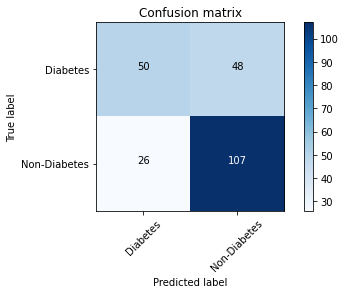

In [54]:
# KNN with K = 5
myKNN = KNeighborsClassifier(n_neighbors=5)
myKNN.fit(train_x, train_y)

# Predict
predictKNN = myKNN.predict(test_x)

# Confusion matrix
# print(confusion_matrix(test_y, predictKNN, labels=[1,0]))
cnf_matrix = confusion_matrix(test_y, predictKNN, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Diabetes','Non-Diabetes'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[ 53  45]
 [ 18 115]]


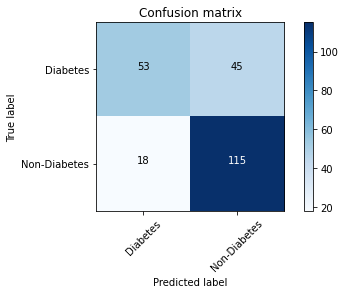

In [55]:
# Logistic Regression
myLR = LogisticRegression(solver='liblinear')
myLR.fit(train_x, train_y)

# Predict
predictLR = myLR.predict(test_x)

# Confusion matrix
# print(confusion_matrix(test_y, predictLR, labels=[1,0]))
cnf_matrix = confusion_matrix(test_y, predictLR, labels=[1,0])
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Diabetes','Non-Diabetes'],normalize= False,  title='Confusion matrix')

#### Conclusion: Choose Logistic regression